In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
# Load your dataset

filename = 'df_list_stock_SET.csv'
data = pd.read_csv(filename)
data = data.set_index('ticker')

In [146]:
print(data.describe())
print(data.columns)

       enterpriseValue  totalCashPerShare  profitMargins  priceToBook  \
count     5.610000e+02         561.000000     561.000000   561.000000   
mean      4.126436e+10           2.866444       0.068256     1.434658   
std       1.591872e+11          12.934660       0.372574     3.524571   
min      -4.433618e+08           0.001000      -2.565740     0.083179   
25%       1.800179e+09           0.157000       0.006090     0.475525   
50%       4.918096e+09           0.492000       0.058440     0.799426   
75%       1.728780e+10           1.533000       0.133280     1.442577   
max       2.069531e+12         248.908000       6.532780    68.601585   

       debtToEquity  returnOnEquity  currentRatio  trailingEps  \
count    561.000000      561.000000    561.000000   561.000000   
mean      75.076219        0.045848      4.091414     0.798324   
std      100.004725        0.302176     21.362062     3.121897   
min        0.010000       -4.969180      0.041000   -16.890000   
25%        9

In [147]:
data_features = data[
    [
     'MF_EarningYield', 
     'current_MF_ROC',
    #  'FCF_Yield',
    #  'priceToBook',
     ]
]
print(data_features.columns)

Index(['MF_EarningYield', 'current_MF_ROC'], dtype='object')


In [148]:
# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_features)


# Convert back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data_features.columns)

print(scaled_df.describe())

       MF_EarningYield  current_MF_ROC
count     5.610000e+02    5.610000e+02
mean      1.108244e-17    2.849770e-17
std       1.000892e+00    1.000892e+00
min      -6.831942e+00   -1.542000e+01
25%      -2.616876e-01   -2.487972e-01
50%       2.318557e-02    4.071412e-02
75%       3.125758e-01    3.907360e-01
max       1.122870e+01    2.283866e+00


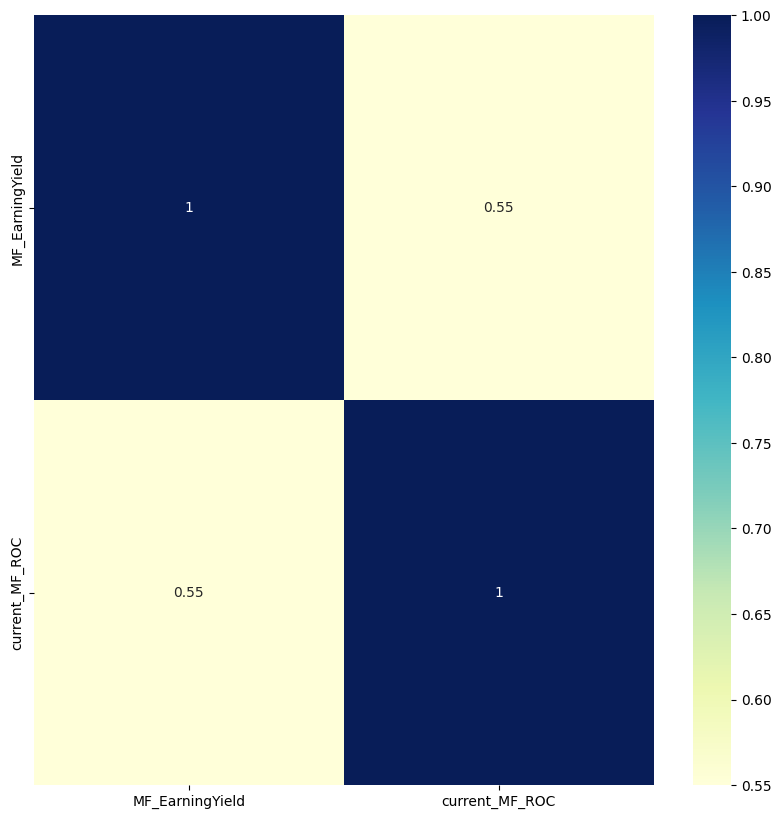

In [149]:
# Plotting correlation heatmap
fig, ax = plt.subplots(figsize=(10,10))

dataplot = sns.heatmap(round(scaled_df.corr(numeric_only=True),2), cmap="YlGnBu", annot=True,ax = ax )

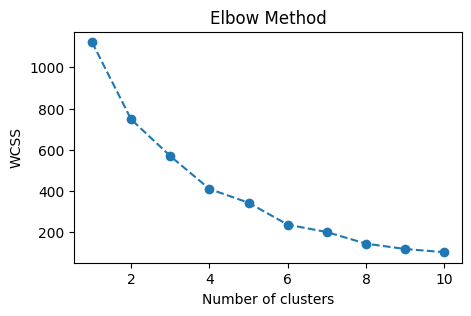

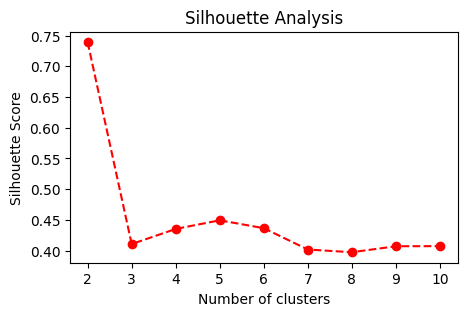

In [150]:
# Generate synthetic data

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state= 1)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(5, 3))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
# plt.savefig('elbow_method.png')
plt.show()

# Silhouette Analysis
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters,random_state=1)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(5, 3))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='r')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
# plt.savefig('silhouette_analysis.png')
plt.show()

Index(['market', 'date_pulling', 'industry', 'sector', 'enterpriseValue',
       'totalCashPerShare', 'profitMargins', 'priceToBook', 'debtToEquity',
       'returnOnEquity', 'currentRatio', 'trailingEps',
       'Total Non Current Assets', 'Working Capital', 'Operating Income',
       'ttm_latest', 'Free Cash Flow', 'avg_MF_ROC', 'avg_growth', 'beta',
       'price_current', 'price_past', 'MF_EarningYield', 'current_MF_ROC',
       'FCF_Yield', 'PE_offset_Cash', 'PE', 'PEG', 'PriceIndex_6m',
       'percenFCFpersharetoprice'],
      dtype='object')


/var/folders/jl/mqglxz2d7gb5ylw3qxtfcr340000gn/T/ipykernel_1277/3842233295.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='upper right')


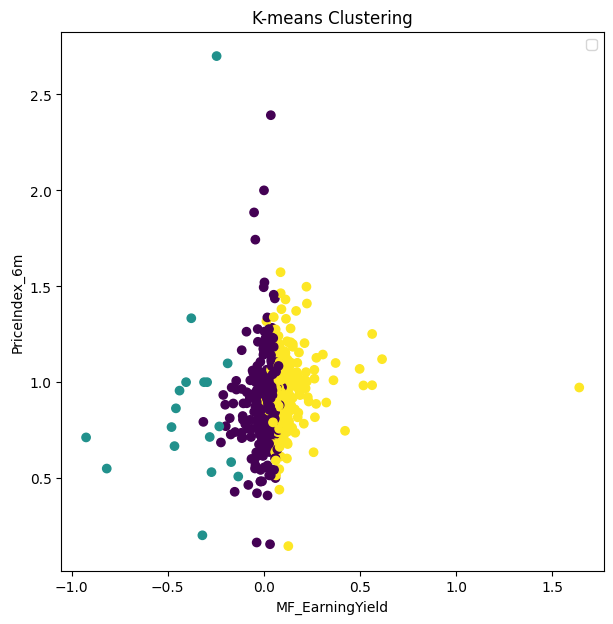

In [151]:
# K-means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters,random_state = 1)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Plotting the clusters
fig, ax1 = plt.subplots(1, 1, figsize=(7, 7))

print(data.columns)
yax = "PriceIndex_6m"
xax = "MF_EarningYield"

# K-means plot
ax1.scatter(data[xax], data[yax], c=kmeans_labels, cmap='viridis')
ax1.set_title('K-means Clustering')
ax1.set_xlabel(xax)
ax1.set_ylabel(yax)
ax1.legend(loc='upper right')


plt.show()

In [152]:
data['clusterno_kmeans'] = kmeans_labels
print(data['clusterno_kmeans'].value_counts().sort_index())

data.to_csv('clustered_'+filename,index= True)

clusterno_kmeans
0    312
1     18
2    231
Name: count, dtype: int64


/var/folders/jl/mqglxz2d7gb5ylw3qxtfcr340000gn/T/ipykernel_1277/1659012425.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(bpdata,labels=[i for i in range(n_clusters)])


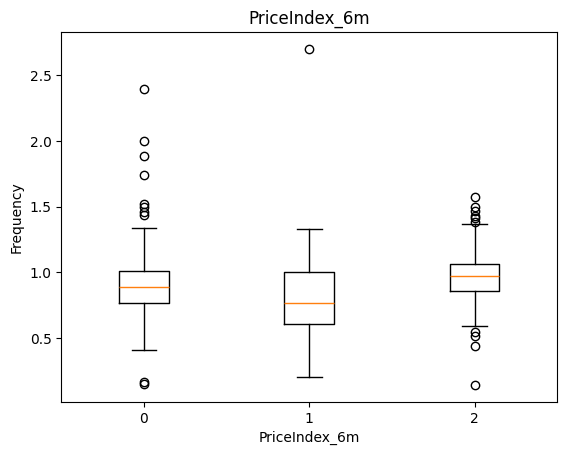

In [153]:
#add three histograms to one plot
bpdata = []
for i in range(0,n_clusters,1):
    bpdata.append(data['PriceIndex_6m'].loc[data['clusterno_kmeans'] == i])
    
plt.boxplot(bpdata,labels=[i for i in range(n_clusters)]) 
#add plot title and axis labels
plt.title('PriceIndex_6m')
plt.xlabel('PriceIndex_6m')
plt.ylabel('Frequency')

#display plot
plt.show()

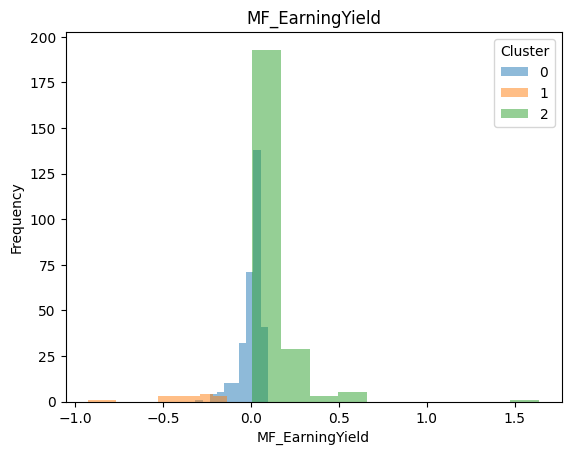

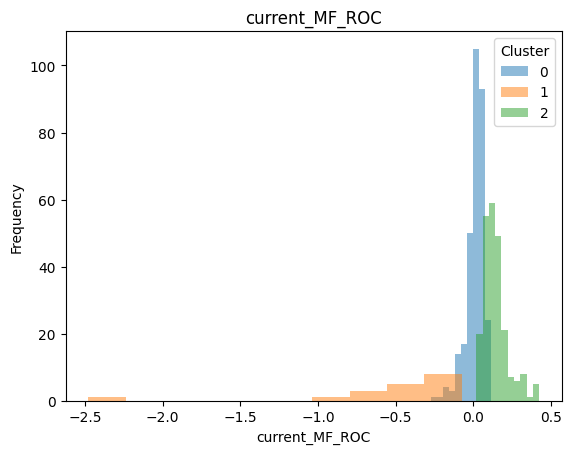

In [154]:
import matplotlib.pyplot as plt

for j in list(data_features.columns) :
    ind = j
    for i in range(0,n_clusters,1):
        #add three histograms to one plot
        plt.hist(data[ind].loc[data['clusterno_kmeans'] == i], alpha=0.5, label=i)


    #add plot title and axis labels
    plt.title(j)
    plt.xlabel(j)
    plt.ylabel('Frequency')

    #add legend
    plt.legend(title='Cluster')
    #display plot
    plt.show()

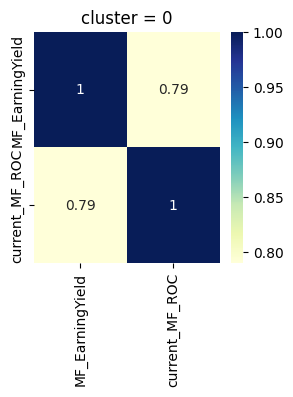

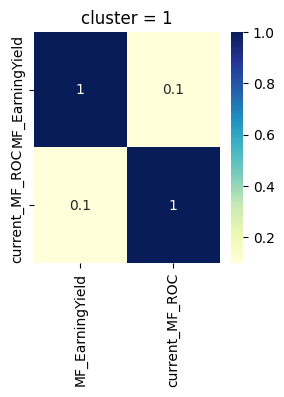

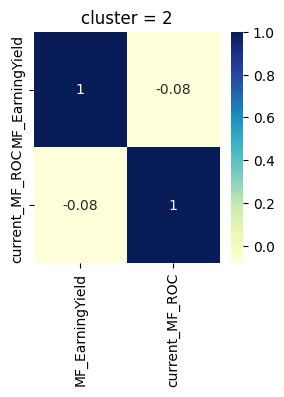

In [155]:
# Plotting correlation heatmap
for i in range(0,n_clusters,1):
    fig, ax = plt.subplots(figsize=(3,3))
    ax.set_title('cluster = ' + str(i))
    dataplot = sns.heatmap(round(data[data_features.columns].loc[data['clusterno_kmeans'] == i].corr(numeric_only=True),2), cmap="YlGnBu", annot=True,ax = ax )